# Apply K-means clustering in the attached scotch review data. Try to answer "Expensive scotch tastes better?"

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler


In [2]:
#read the data using pandas
df=pd.read_csv("scotch_review.csv")

In [3]:
#read the top five data in datagrame
df.head()

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [4]:
#display the last five data in dataframe
df.tail()

,Unnamed: 0,name,category,review.point,price,currency,description
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00,$,"Its best attributes are vanilla, toasted cocon..."
2243,2244,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00,$,"Aged in a sherry cask, which adds sweet notes ..."
2244,2245,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00,$,"Earthy, fleshy notes with brooding grape notes..."
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00,$,"The sherry is very dominant and cloying, which..."
2246,2247,Distillery Select 'Inchmoan' (distilled at Loc...,Single Malt Scotch,63,60.00,$,"Fiery peat kiln smoke, tar, and ripe barley on..."


Text(0, 0.5, 'price')

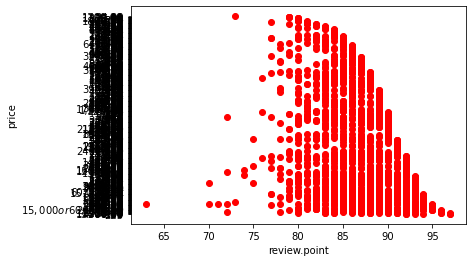

In [5]:
#Display "review.point" and "price" in scatter plot 
plt.scatter(df['review.point'],df['price'],color='red')
plt.xlabel('review.point')
plt.ylabel('price')

In [6]:
#We drop two columns "Unnamed" and "currency".This doesnot effect on your data.
df=df.drop(['Unnamed: 0','currency'],inplace=False, axis=1)

In [7]:
#we drop the rows 19
df=df.drop(19)

In [8]:
df.dtypes

name            object
category        object
review.point     int64
price           object
description     object
dtype: object

In [9]:
#print shape of dataset with rows and columns
print(df.shape)

(2246, 5)


In [10]:
df.head()

,name,category,review.point,price,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charmin..."


In [11]:
#copy the original data
df1=df.copy()

In [12]:
# change the "review.point" data point to int  from object.
df1[['review.point']] = df1[['review.point']].astype(int)


In [13]:
df1['price']=pd.Series(df1['price'])
df1['price']=pd.to_numeric(df1['price'], errors='coerce')
#print(pd.to_numeric(df1['price'], errors='coerce'))


In [14]:
#Display the data types of data in dataframe
df1.dtypes

name             object
category         object
review.point      int32
price           float64
description      object
dtype: object

In [15]:
#information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2246 entries, 0 to 2246
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2246 non-null   object 
 1   category      2246 non-null   object 
 2   review.point  2246 non-null   int32  
 3   price         2228 non-null   float64
 4   description   2246 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 96.5+ KB


In [16]:
df1.head()

,name,category,review.point,price,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160.0,"Captivating, enticing, and wonderfully charmin..."


In [17]:
df1.tail()

,name,category,review.point,price,description
2242,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.0,"Its best attributes are vanilla, toasted cocon..."
2243,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.0,"Aged in a sherry cask, which adds sweet notes ..."
2244,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.0,"Earthy, fleshy notes with brooding grape notes..."
2245,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.0,"The sherry is very dominant and cloying, which..."
2246,Distillery Select 'Inchmoan' (distilled at Loc...,Single Malt Scotch,63,60.0,"Fiery peat kiln smoke, tar, and ripe barley on..."


In [18]:
#df1['price']=df1['price'].fillna(0)
#df1['price']=pd.to_numeric(df1['price'], errors='coerce')
df1['price'] = df1['price'].fillna(df1['price'].median())

In [19]:
df1.iloc[:,[2,3]].isnull().sum()

review.point    0
price           0
dtype: int64

In [20]:
X=df1.iloc[:,[2,3]].values

C:\Users\amite\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


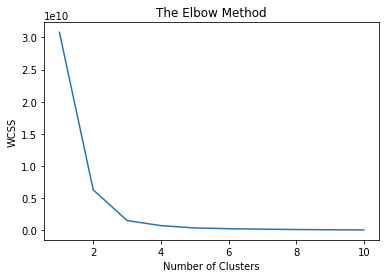

In [21]:
#Using the elbow method to find the optimal number of clusters
df
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)


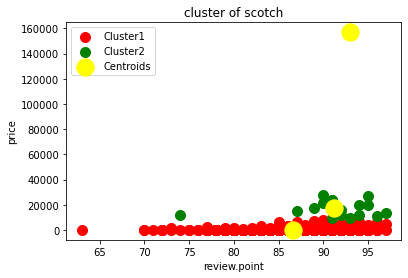

In [23]:
#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
#plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster2')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('cluster of scotch')
plt.xlabel('review.point')
plt.ylabel('price')
plt.legend()
plt.show()

# Preprocessing using min max scaler

In [24]:
scaler = MinMaxScaler()

scaler.fit(df1[['price']])
df1['price'] = scaler.transform(df1[['price']])

scaler.fit(df1[['review.point']])
df1['review.point'] = scaler.transform(df1[['review.point']])

In [25]:
df1.head()

,name,category,review.point,price,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,1.000000,0.001357,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,1.000000,0.028588,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,1.000000,0.085917,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,0.970588,0.001994,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,0.970588,0.000943,"Captivating, enticing, and wonderfully charmin..."


In [26]:
kmeans.cluster_centers_

array([[8.66588869e+01, 2.79321364e+02],
       [9.30000000e+01, 1.57000000e+05],
       [9.12352941e+01, 1.70905882e+04]])

# Apply k means clustering Algorithm

In [27]:
X=df1.iloc[:,[2,3]].values

C:\Users\amite\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


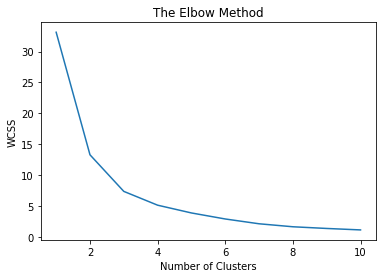

In [28]:
#Using the elbow method to find the optimal number of clusters
df
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'price')

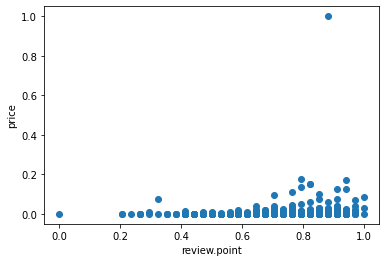

In [29]:
plt.scatter(df1['review.point'],df1['price'])
plt.xlabel('review.point')
plt.ylabel('price')

In [30]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)


In [31]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(X)
y_predicted

array([2, 2, 2, ..., 1, 1, 1])

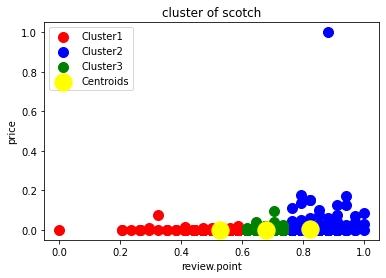

In [32]:
#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('cluster of scotch')
plt.xlabel('review.point')
plt.ylabel('price')
plt.legend()
plt.show()

 from the above diagram 
    
    **It is clearly visible that "Expensive scotch tastes better" 